# Light Curve Fitting with ExoCTK
ExoCTK performs light curve fitting with the `ExoCTK.lightcurve_fitting` tool. This notebook will show you how to do it. 

First, some imports and a toy light curve to work with:

In [13]:
# Imports
import numpy as np
import astropy.units as q
from ExoCTK.lightcurve_fitting.lightcurve import LightCurve
from ExoCTK.lightcurve_fitting.parameters import Parameters
from ExoCTK.lightcurve_fitting.models import Model, PolynomialModel, TransitModel
%matplotlib inline

In [48]:
# Toy data
time = np.linspace(0, 10, 100)*q.hour
raw_flux = [0.95 if 25<i<75 else 1 for i in range(100)]
flux = np.random.normal(raw_flux, scale=0.001)
flux[70:75] *= np.linspace(1, 1.05, 5)
flux[26:31] *= np.linspace(1.05, 1., 5)
unc = np.random.normal(size=100, scale=0.005)

# Put a gap in the data
# idx, = np.where(np.logical_or(time<5*q.hour,time>8*q.hour))
# time, flux, unc = [arr[idx] for arr in [time, flux, unc]]

## Create a light curve
Creating a light curve instance is simple. Just pass `ExoCTK.lightcurve_fitting.lightcurve.LightCurve()` a `time` and `flux` array. You can also pass it the associated uncertainty with the `unc` argument.

The `units` argument is just the units of the given time axis, in this case 'day'.

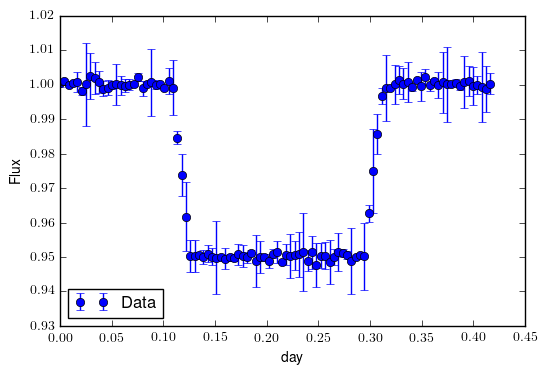

In [49]:
# Instantiate a lightcurve
lc = LightCurve(time, flux, unc, name='Data')
lc.plot()

## Create some models to fit to the light curve
Now that we have our light curve data loaded, let's create some models to fit to it.

We can create an arbitrary model with the `ExoCTK.lightcurve_fitting.models.Model()` class by passing it a `time` axis and `flux` axis.

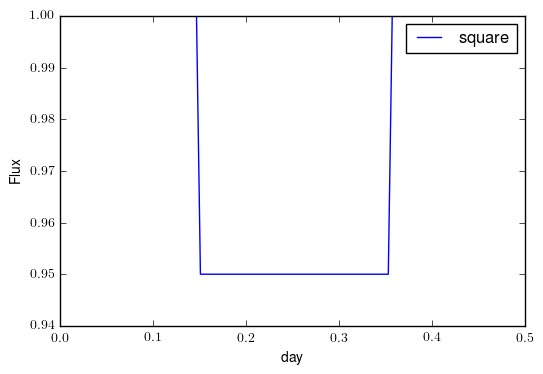

In [50]:
# Create a model
my_model = Model(time=np.linspace(1, 11, 100)*q.hour, flux=raw_flux, name='square')
my_model.plot()

Or we can use one of the many supported models by calling them directly. We'll create a simple linear model using the `PolynomialModel` class.

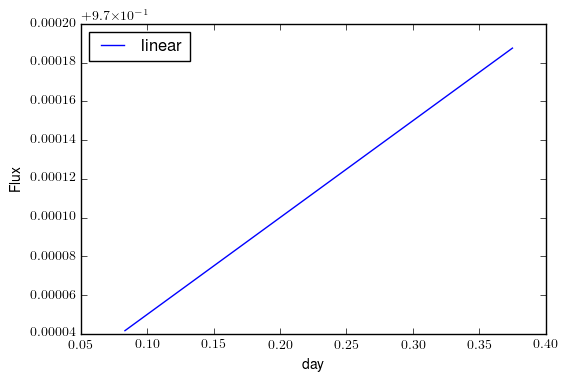

In [79]:
# Create a PolynomialModel instance with coeffs [c1, c0]
lin_model = PolynomialModel(time=np.linspace(2, 9, 100)*q.hour, c1=0.0005, c0=0.97, name='linear')
lin_model.plot()

An arbitrary number of models can then be multiplied to produce a final model to fit to the data.

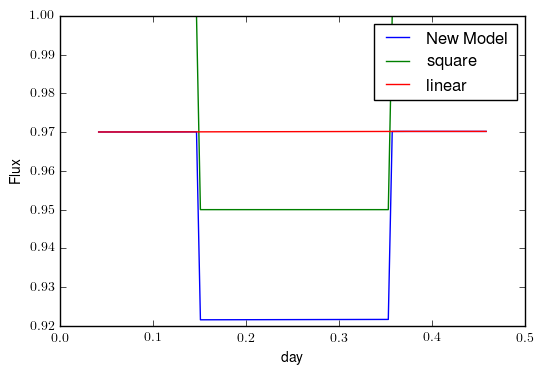

In [52]:
# Make a new model by multiplying some model components (which don't necessarily overlap)
# Make the interpolation fill in with ones
model = my_model*lin_model
model.plot(components=True)

## Fit the model to the light curve data
To fit a model to the data, we need to supply the `LightCurve.fit()` method with a `Model` instance and then specify our choice of fitting routine.

[[Model]]
    Model(eval)
[[Fit Statistics]]
    # function evals   = 9
    # data points      = 100
    # variables        = 2
    chi-square         = 0.059
    reduced chi-square = 0.001
    Akaike info crit   = -740.328
    Bayesian info crit = -735.118
[[Variables]]
    c0:   0.97876539 +/- 0.004851 (0.50%) (init= 1)
    c1:  -0.00332660 +/- 0.020116 (604.72%) (init= 0.0002)
[[Correlations]] (unreported correlations are <  0.100)
    C(c0, c1)                    = -0.864 



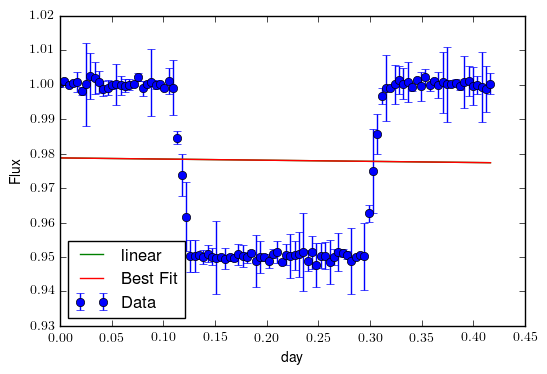

In [53]:
# Get initial parameters
lin_model.parameters = Parameters(c0=1, c1=0.0002)
# Do something like this:
# lin_modle.parameters.c0.prior = gaussian() # default to uniform

# # Fit the model to the data
result = lc.fit(lin_model, fitter='lmfit')

# Plot it!
lc.plot()
lin_model.plot()
result.plot()

Nice! Try it with a transit curve.

[[Model]]
    Model(eval)
[[Fit Statistics]]
    # function evals   = 9
    # data points      = 100
    # variables        = 6
    chi-square         = 0.001
    reduced chi-square = 0.000
    Akaike info crit   = -1124.816
    Bayesian info crit = -1109.185
[[Variables]]
    rp:          0.22000000 +/- 0        (0.00%) (init= 0.22)
    per:         10.72149 (fixed)
    t0:          0.21000000 +/- 0        (0.00%) (init= 0.21)
    inc:         89.7000000 +/- 0        (0.00%) (init= 89.7)
    a:           18.2000000 +/- 0        (0.00%) (init= 18.2)
    ecc:         0 (fixed)
    w:           90 (fixed)
    u1:          0.10000000 +/- 0        (0.00%) (init= 0.1)
    u2:          0.10000000 +/- 0        (0.00%) (init= 0.1)
    slope:       0 (fixed)
    curvature:   0 (fixed)



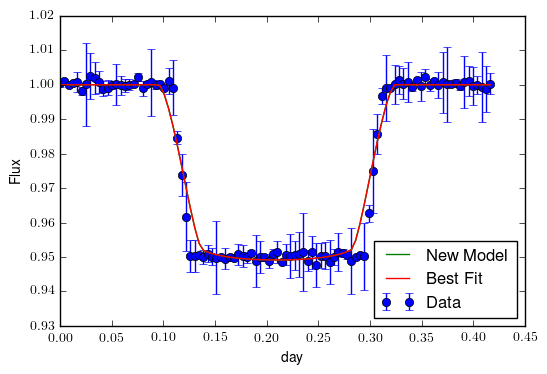

In [78]:
# # Set the intial parameters
# params = Parameters()
# params.rp = 0.22, 'free', 0.0, 0.4
# params.per = 10.721490, 'fixed'
# params.t0 = 0.21, 'free', 0, 0.4
# params.inc = 89.7, 'free', 80., 90.
# params.a = 18.2, 'free', 15., 20.
# params.ecc = 0., 'fixed'
# params.w = 90., 'fixed'
# params.u1 = 0.1, 'free', 0., 1.
# params.u2 = 0.1, 'free', 0., 1.
# params.offset = 1., 'independent'
# params.slope = 0.0, 'fixed'
# params.curvature = 0.0, 'fixed'
# params.limb_dark = 'quadratic', 'independent'
# params.transittype = 'primary', 'independent'

# Set the intial parameters
params = Parameters()
params.rp = 0.22, 'free'
params.per = 10.721490, 'fixed'
params.t0 = 0.21, 'free'
params.inc = 89.7, 'free'
params.a = 18.2, 'free'
params.ecc = 0., 'fixed'
params.w = 90., 'fixed'
params.u1 = 0.1, 'free'
params.u2 = 0.1, 'free'
params.offset = 1., 'independent'
params.slope = 0.0, 'fixed'
params.curvature = 0.0, 'fixed'
params.limb_dark = 'quadratic', 'independent'
params.transittype = 'primary', 'independent'

# Make the transit model
t_model = TransitModel(time=time, parameters=params)

# Do the fit
result = lc.fit(t_model, fitter='lmfit')

# Plot it!
lc.plot()
t_model.plot()
result.plot()

In [87]:
import functools
def compose(*functions):
    return functools.reduce(lambda f, g: lambda x: f(g(x)), functions, lambda x: x)

In [88]:
def add(a, b):
    return a+b

def mul(b, c):
    return b*c

In [89]:
add_mul = compose(add, mul)

In [90]:
add_mul(1, 2, 3)

TypeError: <lambda>() takes 1 positional argument but 3 were given